In [ ]:
!pip install squarify

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [41]:
%cd '/content/gdrive/My Drive/LDS0_K273_ONLINE_DoThiPhuong/Topic_1/'

/content/gdrive/My Drive/LDS0_K273_ONLINE_DoThiPhuong/Topic_1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# import squarify
from datetime import datetime

In [2]:
df = pd.read_csv('OnlineRetail.csv', encoding= 'unicode_escape')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
string_to_date = lambda x : datetime.strptime(x, "%d-%m-%Y %H:%M").date()

#convert
df['InvoiceDate'] = df['InvoiceDate'].apply(string_to_date)
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [6]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France


In [7]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [47]:
# Let’s take a closer look at the data we will need to manipulate.
print('Transactions timeframe from {} to {}'.format(df['InvoiceDate'].min(), df['InvoiceDate'].max()))
print('{:,} transactions don\'t have a customer id'.format(df[df.CustomerID.isnull()].shape[0]))
print('{:,} unique CustomerID'.format(len(df.CustomerID.unique())))

Transactions timeframe from 2010-12-01 00:00:00 to 2011-12-09 00:00:00
0 transactions don't have a customer id
4,372 unique CustomerID


In [48]:
df['total_sales'] = df['Quantity']*df['UnitPrice']

In [49]:
max_date = df['InvoiceDate'].max().date()

Recency = lambda x : (max_date - x.max().date()).days
Frequency = lambda x : len(x.unique())
Monetary = lambda x : round(sum(x), 2)

df_RFM = df.groupby('CustomerID').agg({'InvoiceDate': Recency,
                                        'InvoiceNo': Frequency,
                                        'total_sales': Monetary})

In [50]:
df_RFM.head()

,InvoiceDate,InvoiceNo,total_sales
CustomerID,,,
12346.0,325,2,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,18,1,1757.55
12350.0,310,1,334.40


In [51]:
df_RFM.columns = ['Recency', 'Frequency', 'Monetary']
df_RFM = df_RFM.sort_values('Monetary', ascending = False)

In [52]:
df_RFM.head()

,Recency,Frequency,Monetary
CustomerID,,,
14646.0,1,77,279489.02
18102.0,0,62,256438.49
17450.0,8,55,187482.17
14911.0,1,248,132572.62
12415.0,24,26,123725.45


In [53]:
df_RFM.shape

(4372, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



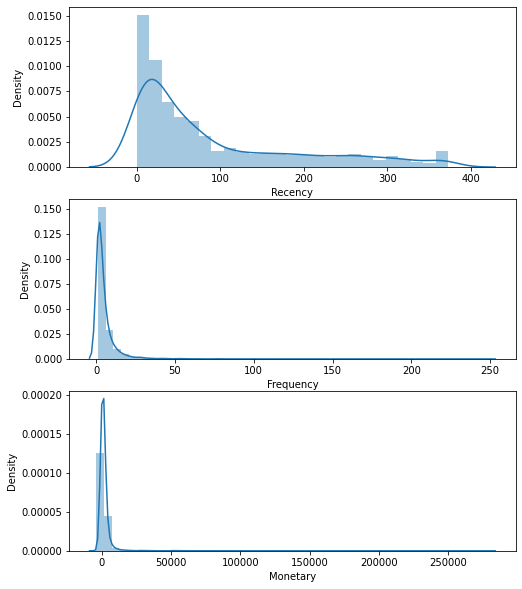

In [54]:
### Virsulization
plt.figure(figsize=(8,10))
plt.subplot(3, 1, 1)
sns.distplot(df_RFM['Recency'])# Plot distribution of R
plt.subplot(3, 1, 2)
sns.distplot(df_RFM['Frequency'])# Plot distribution of F
plt.subplot(3, 1, 3)
sns.distplot(df_RFM['Monetary']) # Plot distribution of M
plt.show()

## Nhận xét:
- Recency tập trung từ 0-100 ngày, 100-400 có tỷ lệ ít hơn
- Frequency tập trung từ 0-20 đơn hàng, từ 20-50 đơn tỷ lệ giảm dần và từ 50-250 đơn có nhưng rất ít
- Monetary tập trung từ 0-10000, từ 10000-280000 có nhưng rất ít
- Frequency, Monetary: phân phối lệch phải

In [72]:
!pip install pyclustertend

In [73]:
from pyclustertend import hopkins

In [76]:
hopkins(df_RFM, len(df_RFM))

0.0059435703025524245

### Chỉ số hopkins cho thấy dữ liệu có khả năng phân cụm lớn



In [55]:
r_labels = range(4, 0, -1) #ngày càng xa thì giá trị càng nhỏ
f_labels = range(1, 5)
m_labels = range(1, 5)

In [56]:
[*r_labels]

[4, 3, 2, 1]

In [57]:
r_groups = pd.qcut(df_RFM['Recency'].rank(method = 'first'), q = 4, labels = r_labels)
f_groups = pd.qcut(df_RFM['Frequency'].rank(method = 'first'), q = 4, labels = f_labels)
m_groups = pd.qcut(df_RFM['Monetary'].rank(method = 'first'), q = 4, labels = m_labels)

In [58]:
df_RFM = df_RFM.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values )
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
14646.0,1,77,279489.02,4,4,4
18102.0,0,62,256438.49,4,4,4
17450.0,8,55,187482.17,4,4,4
14911.0,1,248,132572.62,4,4,4
12415.0,24,26,123725.45,3,4,4


In [59]:
def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))
df_RFM['RFM_Segment'] = df_RFM.apply(join_rfm, axis=1)

In [60]:
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment
CustomerID,,,,,,,
14646.0,1,77,279489.02,4,4,4,444
18102.0,0,62,256438.49,4,4,4,444
17450.0,8,55,187482.17,4,4,4,444
14911.0,1,248,132572.62,4,4,4,444
12415.0,24,26,123725.45,3,4,4,344


In [61]:
rfm_count_unique = df_RFM.groupby('RFM_Segment')['RFM_Segment'].nunique()

In [62]:
print(rfm_count_unique.sum())

63


In [63]:
df_RFM['RFM_Score'] = df_RFM[['R','F', 'M']].sum(axis = 1)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
14646.0,1,77,279489.02,4,4,4,444,12
18102.0,0,62,256438.49,4,4,4,444,12
17450.0,8,55,187482.17,4,4,4,444,12
14911.0,1,248,132572.62,4,4,4,444,12
12415.0,24,26,123725.45,3,4,4,344,11


In [64]:
def rfm_level(df):
    if (df['RFM_Score'] >= 10)  :
        return 'VIP'
    
    elif (df['R'] == 4 and df['F'] ==1 and df['M'] == 1):
        return 'NEW'
    
    else:     
        if df['M'] == 4:
            return 'BIG SPENDER'
        
        elif df['F'] == 4:
            return 'LOYAL'
        
        elif df['R'] == 4:
            return 'ACTIVE'
        
        elif df['R'] == 1:
            return 'LOST'
        
        elif df['M'] == 1:
            return 'LIGHT'
        
        return 'REGULARS'

In [65]:
df_RFM['RFM_Level'] = df_RFM.apply(rfm_level, axis = 1)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
14646.0,1,77,279489.02,4,4,4,444,12,VIP
18102.0,0,62,256438.49,4,4,4,444,12,VIP
17450.0,8,55,187482.17,4,4,4,444,12,VIP
14911.0,1,248,132572.62,4,4,4,444,12,VIP
12415.0,24,26,123725.45,3,4,4,344,11,VIP


In [66]:
df_RFM['RFM_Level'].value_counts()

VIP            1262
REGULARS       1087
LOST           1021
LIGHT           459
ACTIVE          240
BIG SPENDER     170
LOYAL            95
NEW              38
Name: RFM_Level, dtype: int64

In [67]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_agg = df_RFM.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg['Percent'] = round((rfm_agg['Count']/rfm_agg.Count.sum())*100, 2)

# Reset the index
rfm_agg = rfm_agg.reset_index()

In [68]:
rfm_agg

,RFM_Level,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,ACTIVE,8.0,2.0,464.0,240,5.49
1,BIG SPENDER,111.0,4.0,2734.0,170,3.89
2,LIGHT,60.0,1.0,170.0,459,10.50
3,LOST,249.0,2.0,343.0,1021,23.35
4,LOYAL,109.0,7.0,865.0,95,2.17
5,NEW,9.0,1.0,193.0,38,0.87
6,REGULARS,59.0,3.0,714.0,1087,24.86
7,VIP,18.0,12.0,5095.0,1262,28.87


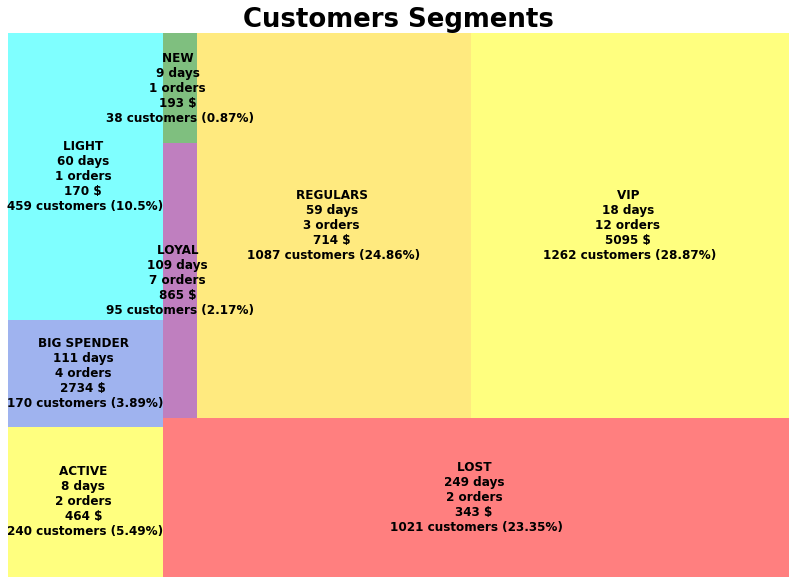

In [69]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict = {'ACTIVE':'yellow','BIG SPENDER':'royalblue', 'LIGHT':'cyan',
               'LOST':'red', 'LOYAL':'purple', 'POTENTIAL':'green', 'STARS':'gold'}

squarify.plot(sizes=rfm_agg['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg.iloc[i])
                      for i in range(0, len(rfm_agg))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('RFM Segments.png')
plt.show()

In [70]:
fig = px.scatter(rfm_agg, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="RFM_Level",
           hover_name="RFM_Level", size_max=100)
fig.show()

In [71]:
fig = px.scatter_3d(df_RFM, x='Recency', y='Frequency', z='Monetary',
                    color = 'RFM_Level', opacity=0.5,
                    color_discrete_map = colors_dict)
fig.update_traces(marker=dict(size=5),
                  
                  selector=dict(mode='markers'))
fig.show()

## Nhận xét:
- Số lượng khách hàng có nguy cơ ra đi (LOST) chiếm tỷ lệ rất lớn (23.35%) -> cần có giải pháp giữ chân khách hàng vì số lượng quá lớn sẽ ảnh hưởng nghiêm trọng đến doanh thu của doanh nghiệp
- Số lượng khách hàng VIP (mua hàng gần đây, số lượng đơn hàng nhiều, số tiền mua hàng lớn) chiếm 28.87%
- Số lượng khách hàng BIG SPENDER (chi nhiều tiền mua hàng) chiếm 3.89%
- Số lượng khách hàng LIGHT (chi ít tiền mua hàng) chiếm 10.5%
- Số lượng khách hàng ACTIVE (còn mua hàng gần đây) chiếm 5.49%
- Số lượng khách hàng LOYAL (số lượng đơn hàng nhiều) chiếm 2.17%
- Số lượng khách hàng NEW (mua hàng gần đây, số lượng đơn hàng ít, số tiền ít) chiếm 0.87%
- Số lượng khách hàng REGULARS (thông thường) chiếm 24.86%

## Kmeans clusters with the Elbow Method

In [77]:
df_now = df_RFM[['Recency', 'Frequency', 'Monetary']]
df_now

,Recency,Frequency,Monetary
CustomerID,,,
14646.0,1,77,279489.02
18102.0,0,62,256438.49
17450.0,8,55,187482.17
14911.0,1,248,132572.62
12415.0,24,26,123725.45
...,...,...,...
12503.0,337,1,-1126.00
17603.0,50,5,-1165.30
14213.0,371,1,-1192.20


In [78]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_now)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

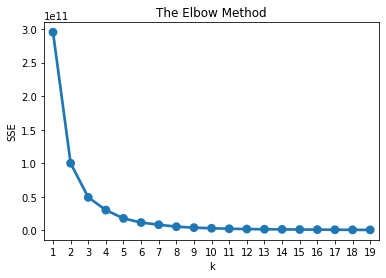

In [79]:
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

- K có thể nhận giá trị trong khoảng 3-6. Có 2 điểm gãy ở k=3 và k=5 tuy nhiên nếu chia KH làm 3 nhóm thì số lượng nhóm ít và dễ dẫn tới những chiến lược không phù hợp cho việc chăm sóc KH.
- Đầu tiên em sẽ phân cụm với k=5

In [80]:
# Build model with k=5
model = KMeans(n_clusters=5, random_state=42)
model.fit(df_now)
model.labels_.shape

(4372,)

In [81]:
df_now["Cluster"] = model.labels_
df_now.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency   Monetary      
           mean      mean       mean count
Cluster                                   
0         20.28     19.53    8089.03   267
1          8.80     88.20  129057.95     5
2          0.50     69.50  267963.76     2
3          6.33     58.26   40928.79    27
4         96.97      3.64     946.70  4071

In [82]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_agg2 = df_now.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg2.columns = rfm_agg2.columns.droplevel()
rfm_agg2.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg2['Percent'] = round((rfm_agg2['Count']/rfm_agg2.Count.sum())*100, 2)

# Reset the index
rfm_agg2 = rfm_agg2.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg2['Cluster'] = 'Cluster '+ rfm_agg2['Cluster'].astype('str')

# Print the aggregated dataset
rfm_agg2

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Cluster 0,20.0,20.0,8089.0,267,6.11
1,Cluster 1,9.0,88.0,129058.0,5,0.11
2,Cluster 2,0.0,70.0,267964.0,2,0.05
3,Cluster 3,6.0,58.0,40929.0,27,0.62
4,Cluster 4,97.0,4.0,947.0,4071,93.12


- Với k = 5, dữ liệu tập trung tới 93.12% vào 1 nhóm, trong khi 4 nhóm còn lại chỉ chiếm tỷ lệ rất nhỏ.
- Nhận thấy kết quả không phù hợp nên em sẽ phân cụm với k khác để tìm k phù hợp hơn.

In [83]:
# Build model with k=3
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_now)
model.labels_.shape

(4372,)

In [84]:
df_now["Cluster"] = model.labels_
df_now.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency   Monetary      
           mean      mean       mean count
Cluster                                   
0         92.09      4.72    1434.20  4346
1          3.00     64.67  241136.56     3
2          7.35     64.39   58418.75    23

- Dễ nhận thấy dữ liệu gom vào 1 nhóm lớn và 2 nhóm còn lại rất ít dữ liệu nên cũng không phù hợp

In [85]:
# Build model with k=4
model = KMeans(n_clusters=4, random_state=42)
model.fit(df_now)
model.labels_.shape

(4372,)

In [86]:
df_now["Cluster"] = model.labels_
df_now.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency   Monetary      
           mean      mean       mean count
Cluster                                   
0         93.78      4.20    1160.75  4252
1          3.00     64.67  241136.56     3
2          7.40     67.87   71423.52    15
3         14.94     30.49   15390.30   102

In [87]:
# Build model with k=6
model = KMeans(n_clusters=6, random_state=42)
model.fit(df_now)
model.labels_.shape

(4372,)

In [88]:
df_now["Cluster"] = model.labels_
df_now.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency   Monetary      
           mean      mean       mean count
Cluster                                   
0         25.43     15.01    5703.54   424
1          0.50     69.50  267963.76     2
2        100.02      3.31     813.48  3889
3          6.00     65.15   57077.79    13
4         12.52     38.90   22075.54    40
5         10.50     98.75  139291.10     4

## Nhận xét:
- Sử dụng RFM kết hợp với KMeans trong bài toán này cho kết quả không tốt so với chỉ sử dụng RFM thuần túy. Với k từ 3 đến 6 thì khoảng 90-99.4% dữ liệu tập trung ở 1 phân cụm khách hàng.
- Cần phải scale dữ liệu trước khi áp dụng Kmeans

In [90]:
df_cluster= df_RFM[['Recency', 'Frequency', 'Monetary']]

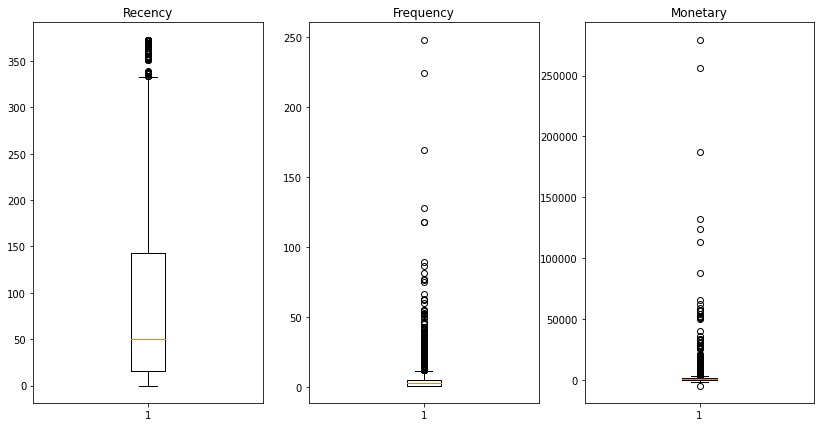

In [92]:
# check outliers
plt.figure(figsize=(14, 7))
plt.subplot(1, 3, 1)
plt.boxplot(df_cluster['Recency'])
plt.title('Recency')
plt.subplot(1, 3, 2)
plt.boxplot(df_cluster['Frequency'])
plt.title('Frequency')
plt.subplot(1, 3, 3)
plt.boxplot(df_cluster['Monetary'])
plt.title('Monetary')
plt.show()

Nhận xét: Các biến đều có số lượng outliers lớn, ở nhóm monetary là đặc biệt lớn. Tuy nhiên, đặc tính của dữ liệu là có các bán buôn nên vài KH có giá trị mua lớn nên được giữ lại => chỉ loại outliers của recency (KH đã mua từ quá lâu) và frequency (KH mua quá nhiều lần).

In [93]:
# Removing (statistical) outliers for Monetary
Q1 = df_cluster.Monetary.quantile(0.25)
Q3 = df_cluster.Monetary.quantile(0.75)
IQR = Q3 - Q1
df_cluster = df_cluster[(df_cluster.Monetary >= Q1 - 1.5*IQR) & (df_cluster.Monetary <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = df_cluster.Recency.quantile(0.25)
Q3 = df_cluster.Recency.quantile(0.75)
IQR = Q3 - Q1
df_cluster = df_cluster[(df_cluster.Recency >= Q1 - 1.5*IQR) & (df_cluster.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = df_cluster.Frequency.quantile(0.25)
Q3 = df_cluster.Frequency.quantile(0.75)
IQR = Q3 - Q1
df_cluster = df_cluster[(df_cluster.Frequency >= Q1 - 1.5*IQR) & (df_cluster.Frequency <= Q3 + 1.5*IQR)]

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit_transform
df_cluster_scaled = scaler.fit_transform(df_cluster)
df_cluster_scaled.shape

(3742, 3)

In [95]:
df_cluster_scaled = pd.DataFrame(df_cluster_scaled)
df_cluster_scaled.columns = ['Recency', 'Frequency', 'Monetary']
df_cluster_scaled.head()

,Recency,Frequency,Monetary
0,-0.629083,1.211523,3.600681
1,-0.984413,0.793418,3.599711
2,-0.461869,0.375312,3.576882
3,-0.963511,1.211523,3.573697
4,-0.911257,3.302052,3.572714


## Áp dụng KMeans

In [99]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster_scaled)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

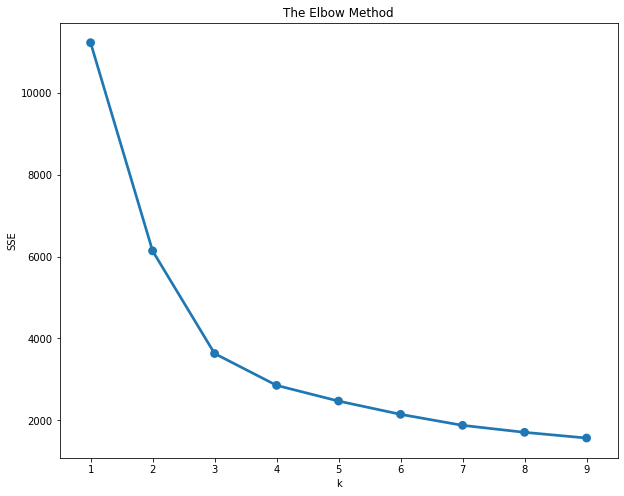

In [100]:
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

- Có các điểm gãy ở k=3 và k=4 tuy nhiên em sẽ chọn k=4 (phân KH làm 3 nhóm thì ít quá, dễ dẫn đến CSKH không phù hợp)

In [101]:
# Build model with k=4
model = KMeans(n_clusters=4, random_state=42)
model.fit(df_cluster_scaled)
model.labels_.shape

(3742,)

In [102]:
df_cluster["Cluster"] = model.labels_
df_cluster.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0        243.34      1.64   359.47   909
1         33.20      7.51  2336.00   466
2         46.69      4.47  1146.78   925
3         52.96      1.72   401.33  1442

In [103]:
df_cluster.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
17203.0,35,6,3563.85,1
15484.0,1,5,3563.11,1
12370.0,51,4,3545.69,1
14503.0,3,6,3543.26,1
15544.0,8,11,3542.51,1


In [104]:
df_cluster.describe()

,Recency,Frequency,Monetary,Cluster
count,3742.000000,3742.000000,3742.000000,3742.000000
mean,95.194281,3.102352,816.361734,1.774987
std,95.698521,2.392059,763.148798,1.196375
min,0.000000,1.000000,-1592.490000,0.000000
25%,21.000000,1.000000,266.392500,1.000000
50%,57.000000,2.000000,555.465000,2.000000
75%,151.750000,4.000000,1125.052500,3.000000
max,361.000000,11.000000,3563.850000,3.000000


In [105]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_agg2 = df_cluster.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg2.columns = rfm_agg2.columns.droplevel()
rfm_agg2.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg2['Percent'] = round((rfm_agg2['Count']/rfm_agg2.Count.sum())*100, 2)

# Reset the index
rfm_agg2 = rfm_agg2.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg2['Cluster'] = 'Cluster '+ rfm_agg2['Cluster'].astype('str')

# Print the aggregated dataset
rfm_agg2

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Cluster 0,243.0,2.0,359.0,909,24.29
1,Cluster 1,33.0,8.0,2336.0,466,12.45
2,Cluster 2,47.0,4.0,1147.0,925,24.72
3,Cluster 3,53.0,2.0,401.0,1442,38.54


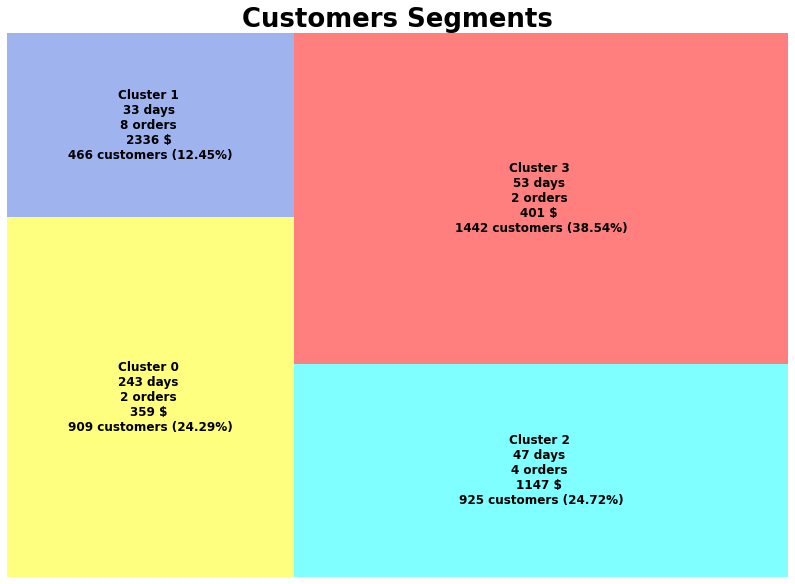

In [106]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict2 = {'Cluster0':'yellow','Cluster1':'royalblue', 'Cluster2':'cyan',
               'Cluster3':'red', 'Cluster4':'purple', 'Cluster5':'green', 'Cluster6':'gold'}

squarify.plot(sizes=rfm_agg2['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict2.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg2.iloc[i])
                      for i in range(0, len(rfm_agg2))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('KMeans Segments.png')
plt.show()

In [107]:
fig = px.scatter_3d(rfm_agg2, x='RecencyMean', y='FrequencyMean', z='MonetaryMean',
                    color = 'Cluster', opacity=0.3)
fig.update_traces(marker=dict(size=20),
                  
                  selector=dict(mode='markers'))
fig.show()

## Nhận xét: Chia KH thành 4 nhóm:
- Cluster 0: thời gian mua hàng xa, ít đơn hàng, ít tiền mua hàng (nguy cơ KH ra đi lớn) chiếm 24.29%
- Cluster 1: mua hàng gần đây, số đơn hàng lớn, số tiền lớn (KH VIP) chiếm 12.45%
- Cluster 2: thời gian mua hàng trung bình, số đơn hàng trung bình, số tiền trung bình (KH thông thường) chiếm 24.72%
- Cluster 3: thời gian mua hàng trung bình, số đơn hàng trung bình, số tiền ít chiếm 38.54%

## Áp dụng Hierarchy

In [108]:
df_hierarchy = df_cluster_scaled[['Recency', 'Frequency', 'Monetary']]

In [109]:
df_hierarchy.head()

,Recency,Frequency,Monetary
0,-0.629083,1.211523,3.600681
1,-0.984413,0.793418,3.599711
2,-0.461869,0.375312,3.576882
3,-0.963511,1.211523,3.573697
4,-0.911257,3.302052,3.572714


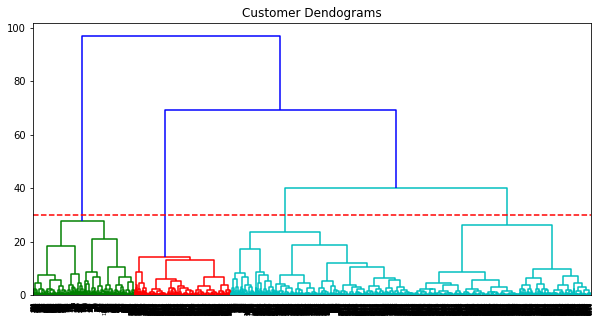

In [151]:
from scipy.cluster import hierarchy
plt.figure(figsize=(10, 5))
plt.title("Customer Dendograms")
dend = hierarchy.dendrogram(hierarchy.linkage(df_hierarchy, method='ward')) 
plt.axhline(y=30, color='r', linestyle='--')

In [112]:
# cluster = 4
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4,
                                affinity='euclidean', linkage='ward')
cluster.fit(df_hierarchy)

AgglomerativeClustering(n_clusters=4)

In [113]:
cluster.labels_

array([0, 0, 0, ..., 2, 1, 1])

In [114]:
df_cluster['Cluster'] = cluster.labels_
df_cluster.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
17203.0,35,6,3563.85,0
15484.0,1,5,3563.11,0
12370.0,51,4,3545.69,0
14503.0,3,6,3543.26,0
15544.0,8,11,3542.51,0


In [115]:
df_cluster.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         31.11      6.86  2066.69   685
1         81.50      1.46   302.05  1186
2        269.29      1.45   361.04   643
3         53.01      3.46   854.03  1228

In [116]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_agg2 = df_cluster.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg2.columns = rfm_agg2.columns.droplevel()
rfm_agg2.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg2['Percent'] = round((rfm_agg2['Count']/rfm_agg2.Count.sum())*100, 2)

# Reset the index
rfm_agg2 = rfm_agg2.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg2['Cluster'] = 'Cluster '+ rfm_agg2['Cluster'].astype('str')

# Print the aggregated dataset
rfm_agg2

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Cluster 0,31.0,7.0,2067.0,685,18.31
1,Cluster 1,82.0,1.0,302.0,1186,31.69
2,Cluster 2,269.0,1.0,361.0,643,17.18
3,Cluster 3,53.0,3.0,854.0,1228,32.82


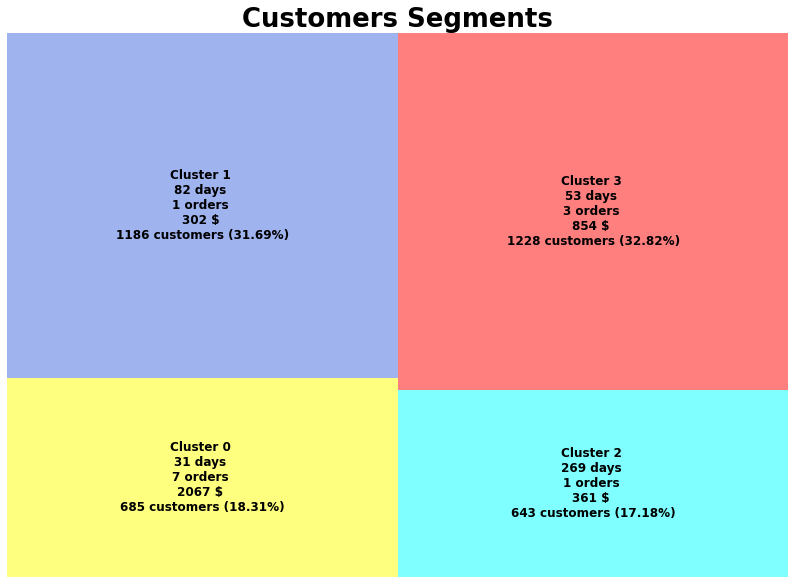

In [117]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict2 = {'Cluster0':'yellow','Cluster1':'royalblue', 'Cluster2':'cyan',
               'Cluster3':'red', 'Cluster4':'purple', 'Cluster5':'green', 'Cluster6':'gold'}

squarify.plot(sizes=rfm_agg2['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict2.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg2.iloc[i])
                      for i in range(0, len(rfm_agg2))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('Hierarchy Segments.png')
plt.show()

In [118]:
fig = px.scatter_3d(rfm_agg2, x='RecencyMean', y='FrequencyMean', z='MonetaryMean',
                    color = 'Cluster', opacity=0.3)
fig.update_traces(marker=dict(size=20),
                  
                  selector=dict(mode='markers'))
fig.show()

## Nhận xét: Khách hàng chia làm 4 nhóm:
- Cluster 0: Khách hàng mua hàng gần đây, số đơn hàng lớn, số tiền lớn (KH VIP) chiếm 18.31%
- Cluster 1: Thời gian mua hàng trung bình, số đơn hàng ít, số tiền ít chiếm 31.69%
- Cluster 2: Khách hàng có thời gian  mua hàng xa, số đơn hàng ít, số tiền ít (KH có nguy cơ ra đi) chiếm 17.18%
- Cluster 3: Thời gian mua hàng trung bình, số đơn hàng trung bình, số tiền trung bình (KH thông thường) chiếm 32.82%

## Áp dụng GMM

In [119]:
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.mixture import GaussianMixture

In [120]:
df_GMM = df_cluster_scaled[['Recency', 'Frequency', 'Monetary']]

In [121]:
list_sil = []
K = range(4,9)
for k in K:
 gmm = GaussianMixture(n_components=k)
 gmm.fit(df_GMM)
 labels = gmm.predict(df_GMM)
 sil = metrics.silhouette_score(df_GMM, labels, metric='euclidean')
 list_sil.append(sil)

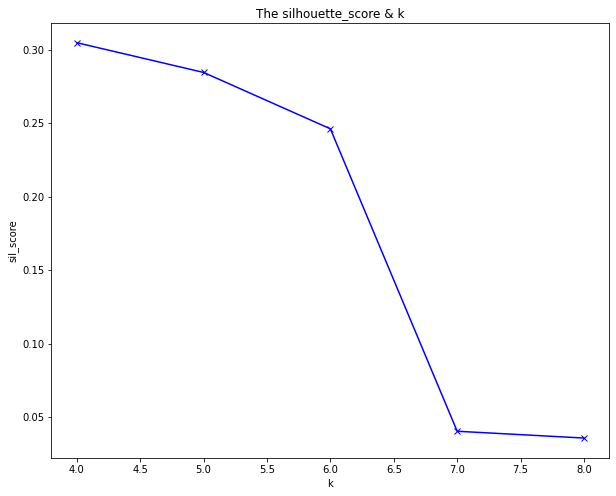

In [122]:
# Plot
plt.plot(K, list_sil, 'bx-')
plt.xlabel('k')
plt.ylabel('sil_score')
plt.title('The silhouette_score & k')
plt.show()

- Số cụm k=4 được đề xuất vì có sil lớn nhất

In [123]:
gmm = GaussianMixture(n_components=4)
gmm.fit(df_GMM)

GaussianMixture(n_components=4)

In [124]:
print(gmm.weights_)

[0.21585083 0.29310558 0.23485067 0.25619292]


In [125]:
print(gmm.means_)

[[ 0.38213147  0.24918705  0.33161589]
 [-0.57948408 -0.51825902 -0.52000487]
 [ 1.22704819 -0.76983438 -0.73295864]
 [-0.78380961  1.08868542  0.98743006]]


In [126]:
print(gmm.covariances_)

[[[ 0.69158166 -0.17996504 -0.21877514]
  [-0.17996504  0.66184332  0.22057768]
  [-0.21877514  0.22057768  0.89068623]]

 [[ 0.0731801  -0.01176258  0.00718332]
  [-0.01176258  0.1390567   0.05895816]
  [ 0.00718332  0.05895816  0.10039287]]

 [[ 0.77138851 -0.01025648 -0.00806571]
  [-0.01025648  0.03426672  0.00968314]
  [-0.00806571  0.00968314  0.04067912]]

 [[ 0.02798954 -0.01295781  0.01265437]
  [-0.01295781  1.06706529  0.49546289]
  [ 0.01265437  0.49546289  1.131222  ]]]


In [127]:
cluster.labels_ = gmm.predict(df_GMM)
df_cluster['Cluster'] = cluster.labels_
df_cluster.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
17203.0,35,6,3563.85,3
15484.0,1,5,3563.11,3
12370.0,51,4,3545.69,3
14503.0,3,6,3543.26,3
15544.0,8,11,3542.51,3


In [128]:
df_cluster.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0        142.47      3.80  1104.33   680
1         40.05      1.79   405.10  1187
2        222.80      1.28   256.16   863
3         19.29      5.73  1582.96  1012

In [129]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_agg2 = df_cluster.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg2.columns = rfm_agg2.columns.droplevel()
rfm_agg2.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg2['Percent'] = round((rfm_agg2['Count']/rfm_agg2.Count.sum())*100, 2)

# Reset the index
rfm_agg2 = rfm_agg2.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg2['Cluster'] = 'Cluster '+ rfm_agg2['Cluster'].astype('str')

# Print the aggregated dataset
rfm_agg2

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Cluster 0,142.0,4.0,1104.0,680,18.17
1,Cluster 1,40.0,2.0,405.0,1187,31.72
2,Cluster 2,223.0,1.0,256.0,863,23.06
3,Cluster 3,19.0,6.0,1583.0,1012,27.04


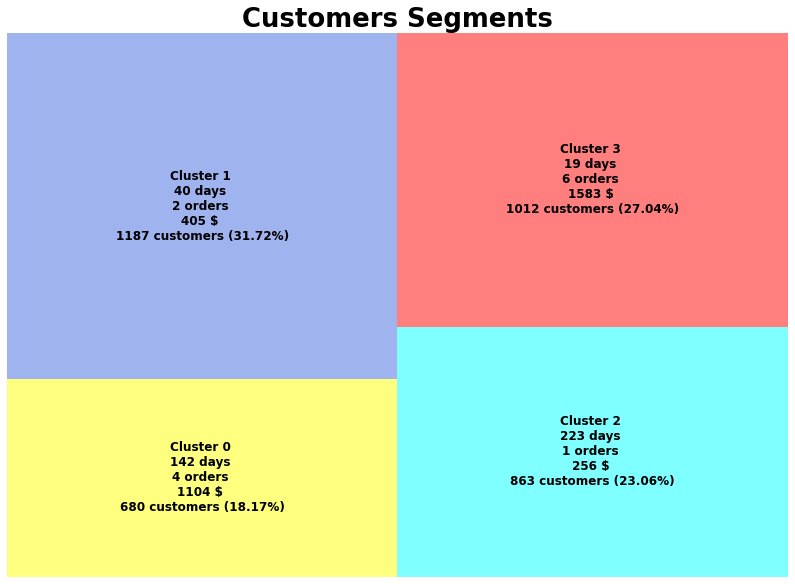

In [132]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict2 = {'Cluster0':'yellow','Cluster1':'royalblue', 'Cluster2':'cyan',
               'Cluster3':'red', 'Cluster4':'purple', 'Cluster5':'green', 'Cluster6':'gold'}

squarify.plot(sizes=rfm_agg2['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict2.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg2.iloc[i])
                      for i in range(0, len(rfm_agg2))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('GMM Segments.png')
plt.show()

In [131]:
fig = px.scatter_3d(rfm_agg2, x='RecencyMean', y='FrequencyMean', z='MonetaryMean',
                    color = 'Cluster', opacity=0.3)
fig.update_traces(marker=dict(size=20),
                  
                  selector=dict(mode='markers'))
fig.show()

## Nhận xét: Khách hàng chia làm 4 nhóm:
- Cluster 0: Thời gian mua hàng xa, số đơn hàng khá, số tiền khá chiếm 18.17%
- Cluster 1: Thời gian mua hàng trung bình, số đơn hàng trung bình, số tiền trung bình chiếm 31.72%
- Cluster 2: Khách hàng có thời gian mua hàng rất xa, số đơn hàng ít, số tiền ít (KH có nguy cơ ra đi) chiếm 23.06%
- Cluster 3: Thời gian mua hàng rất gần, số đơn hàng lớn, số tiền lớn chiếm 27.04%

## Áp dụng DBSCAN

In [133]:
from numpy import where
from numpy import unique

from sklearn.cluster import DBSCAN

In [140]:
df_dbscan = df_cluster_scaled[['Recency', 'Frequency', 'Monetary']]

In [141]:
df_dbscan.head()

,Recency,Frequency,Monetary
0,-0.629083,1.211523,3.600681
1,-0.984413,0.793418,3.599711
2,-0.461869,0.375312,3.576882
3,-0.963511,1.211523,3.573697
4,-0.911257,3.302052,3.572714


In [139]:
from sklearn.neighbors import NearestNeighbors

In [142]:
neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(df_dbscan)
distances, indices = neighbors_fit.kneighbors(df_dbscan)
distances = np.sort(distances, axis=0)

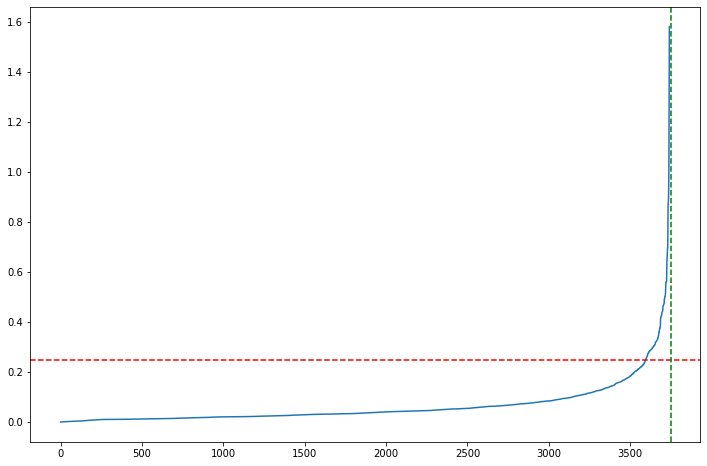

In [147]:
# Theo phương pháp khuỷu tay để tìm esp (Epsilon (ε))
plt.figure(figsize=(12,8))
distances_draw = distances[:,1]
plt.plot(distances_draw)
plt.axhline(y=0.25, color='r', linestyle='--')
plt.axvline(x=3750, color='g', linestyle='--')

In [148]:
dbscan_model = DBSCAN(eps = 0.25, min_samples = 6)

In [149]:
dbscan_model.fit(df_dbscan)

DBSCAN(eps=0.25, min_samples=6)

In [150]:
unique(dbscan_model.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22])

Dữ liệu được chia thành 24 nhóm là quá nhiều nhóm nên DBSCAN không phù hợp cho bài toán này.

# Kết luận: 
- Rất khó để nói cách phân cụm KH nào tốt hơn, điều này tùy thuộc vào tiêu chí cụ thể doanh nghiệp đưa ra
- Cá nhân em lựa chọn cách phân cụm KH có sự kết hợp giữa RFM và Hierarchical do số nhóm hợp lý tính chất KH trong mỗi nhóm rõ ràng hơn.
- Tùy theo chiến lược của doanh nghiệp, cần phối hợp với các phòng ban khác để đề ra chiến lược marketing và chăm sóc KH phù hợp cho mỗi nhóm KH để bán được nhiều sản phẩm hơn từ đó tăng doanh thu và lợi nhuận cho doanh nghiệp.